In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("usaarrests.csv")

In [3]:
df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df = df.drop("State",axis=1)

In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [8]:
scaler = StandardScaler()

In [9]:
df_scaled = scaler.fit_transform(df)

In [10]:
df_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [11]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

In [12]:
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [13]:
hier_cluster = linkage(df_scaled, method='ward')

### Hierarchical Dendogram - Total 3 clusters

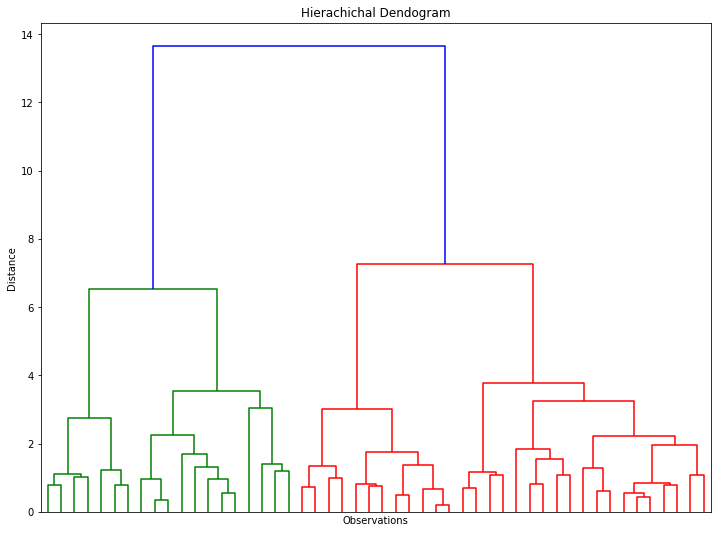

In [14]:
plt.figure(figsize=(12,9))
plt.title("Hierachichal Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")

dendrogram(hier_cluster,show_leaf_counts=False,no_labels=True)
plt.show()

### K-Means Clustering

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

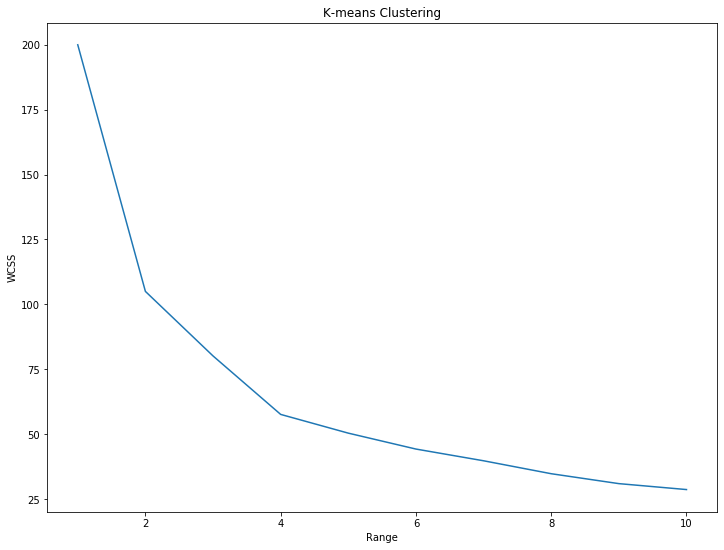

In [16]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title("K-means Clustering")
plt.xlabel("Range")
plt.ylabel("WCSS")

In [17]:
X = df_scaled

In [18]:
X.values

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, random_state=0)

In [20]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
df_kmeans = X.copy()
df_kmeans['Segment K-means'] = kmeans.labels_

In [22]:
df_kmeans.head(10)

,Murder,Assault,UrbanPop,Rape,Segment K-means
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,2
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,1


In [23]:
#Save to csv
#df_kmeans.to_csv("usaarrestlabeled.csv",index=False)

In [24]:
df_analysis = df_kmeans.groupby(['Segment K-means']).mean()
df_analysis

,Murder,Assault,UrbanPop,Rape
Segment K-means,,,,
0,-0.494407,-0.386484,0.581676,-0.264310
1,1.015137,1.024120,0.199591,0.855564
2,-0.885159,-1.021332,-0.949903,-0.920165


**0 is midlevel arrests, 1 is highlevel arrests, 2 is lowlevel arrests**

In [25]:
df_analysis.rename({0:'Medium arrests',1:'High arrests',2:'Low arrests'})

,Murder,Assault,UrbanPop,Rape
Segment K-means,,,,
Medium arrests,-0.494407,-0.386484,0.581676,-0.264310
High arrests,1.015137,1.024120,0.199591,0.855564
Low arrests,-0.885159,-1.021332,-0.949903,-0.920165


In [26]:
df_kmeans['Label'] = df_kmeans['Segment K-means'].map({0:'Medium arrests',1:'High arrests',2:'Low arrests'})

In [27]:
df_kmeans

,Murder,Assault,UrbanPop,Rape,Segment K-means,Label
0,1.255179,0.790787,-0.526195,-0.003451,1,High arrests
1,0.513019,1.118060,-1.224067,2.509424,1,High arrests
2,0.072361,1.493817,1.009122,1.053466,1,High arrests
3,0.234708,0.233212,-1.084492,-0.186794,2,Low arrests
4,0.281093,1.275635,1.776781,2.088814,1,High arrests
5,0.025976,0.402909,0.869548,1.883901,1,High arrests
6,-1.040880,-0.736484,0.799761,-1.092723,0,Medium arrests
7,-0.437875,0.815030,0.450825,-0.585834,0,Medium arrests
8,1.765415,1.990786,1.009122,1.150530,1,High arrests
9,2.229265,0.487757,-0.386621,0.492653,1,High arrests


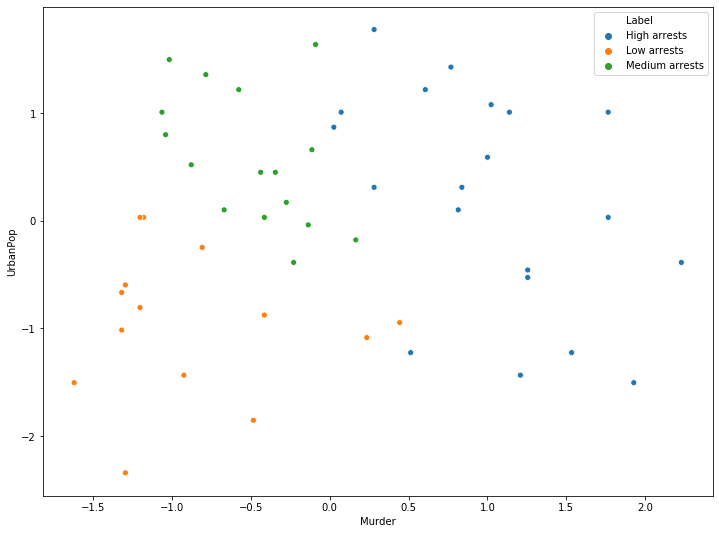

In [28]:
fig, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(x=df_kmeans.Murder,y=df_kmeans.UrbanPop,hue=df_kmeans.Label,ax=ax)
plt.show()

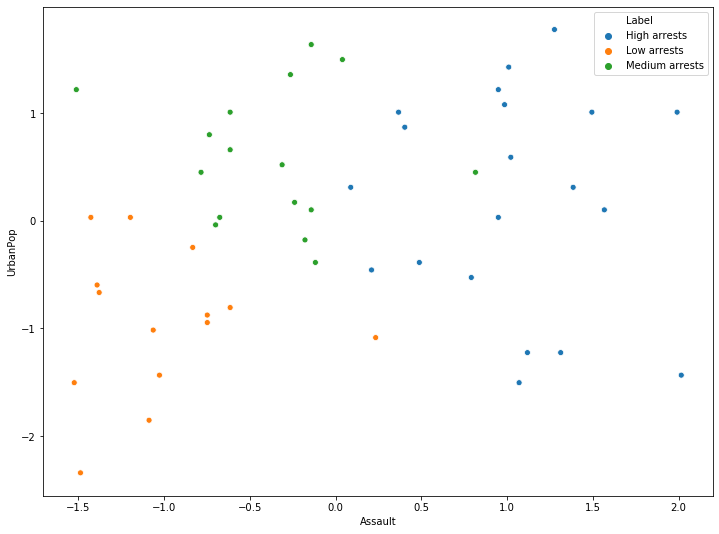

In [29]:
fig, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(x=df_kmeans.Assault,y=df_kmeans.UrbanPop,hue=df_kmeans.Label,ax=ax)
plt.show()

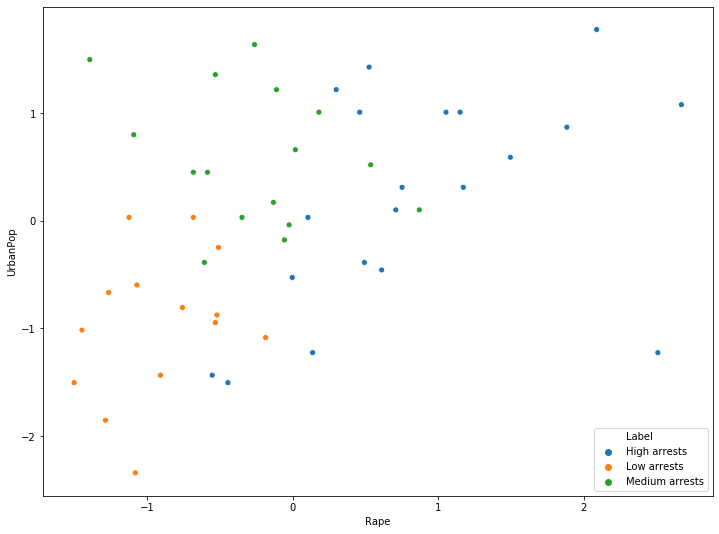

In [30]:
fig, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(x=df_kmeans.Rape,y=df_kmeans.UrbanPop,hue=df_kmeans.Label,ax=ax)
plt.show()

### PCA

In [31]:
pca = PCA()

In [32]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

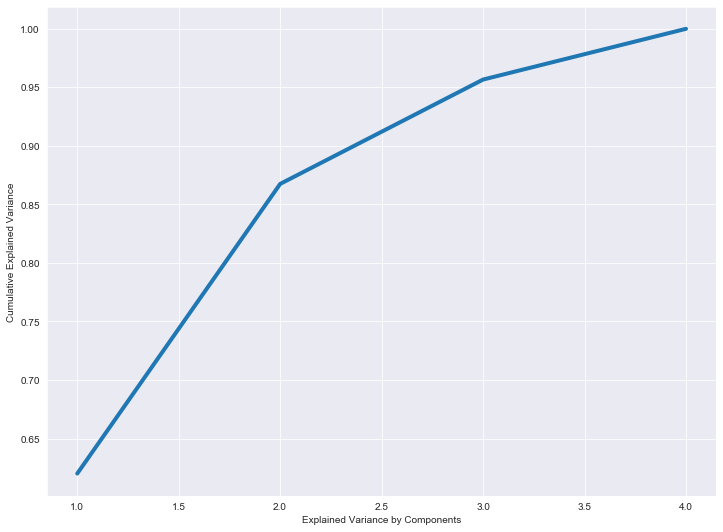

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,9))
plt.plot(range(1,5),pca.explained_variance_ratio_.cumsum(),linewidth=4)
plt.xlabel('Explained Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Choose 3.0 to represent 95%**

In [35]:
pca3 = PCA(n_components=3)

In [36]:
pca3.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca3.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [38]:
pca3.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791]])

In [39]:
df_pca_comp = pd.DataFrame(data=pca3.components_,columns=df_scaled.columns.values,
                           index=['Component 1', 'Component 2','Component 3'])

In [40]:
df_pca_comp

,Murder,Assault,UrbanPop,Rape
Component 1,0.535899,0.583184,0.278191,0.543432
Component 2,0.418181,0.187986,-0.872806,-0.167319
Component 3,-0.341233,-0.268148,-0.378016,0.817778


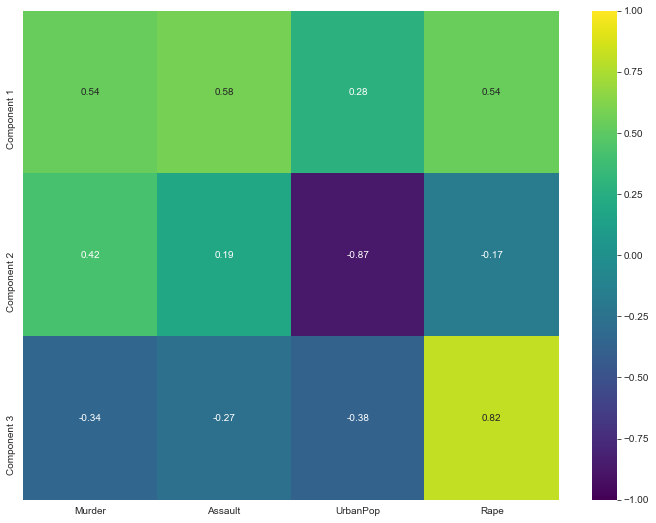

In [41]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,vmin=-1,vmax=1.0,annot=True, cmap='viridis')
plt.show()

In [42]:
pca3.transform(df_scaled)

array([[ 0.98556588,  1.13339238, -0.44426879],
       [ 1.95013775,  1.07321326,  2.04000333],
       [ 1.76316354, -0.74595678,  0.05478082],
       [-0.14142029,  1.11979678,  0.11457369],
       [ 2.52398013, -1.54293399,  0.5985568 ],
       [ 1.51456286, -0.98755509,  1.09500699],
       [-1.35864746, -1.08892789, -0.64325757],
       [ 0.04770931, -0.32535892, -0.71863294],
       [ 3.01304227,  0.03922851, -0.57682949],
       [ 1.63928304,  1.2789424 , -0.34246008],
       [-0.91265715, -1.57046001,  0.05078189],
       [-1.63979985,  0.21097292,  0.25980134],
       [ 1.37891072, -0.68184119, -0.67749564],
       [-0.50546136, -0.15156254,  0.22805484],
       [-2.25364607, -0.10405407,  0.16456432],
       [-0.79688112, -0.2701647 ,  0.02555331],
       [-0.75085907,  0.95844029, -0.02836942],
       [ 1.56481798,  0.87105466, -0.78348036],
       [-2.39682949,  0.37639158, -0.06568239],
       [ 1.76336939,  0.42765519, -0.15725013],
       [-0.48616629, -1.4744965 , -0.609

In [43]:
scorespca = pca3.transform(df_scaled)

In [44]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=0)
    kmeans_pca.fit(scorespca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

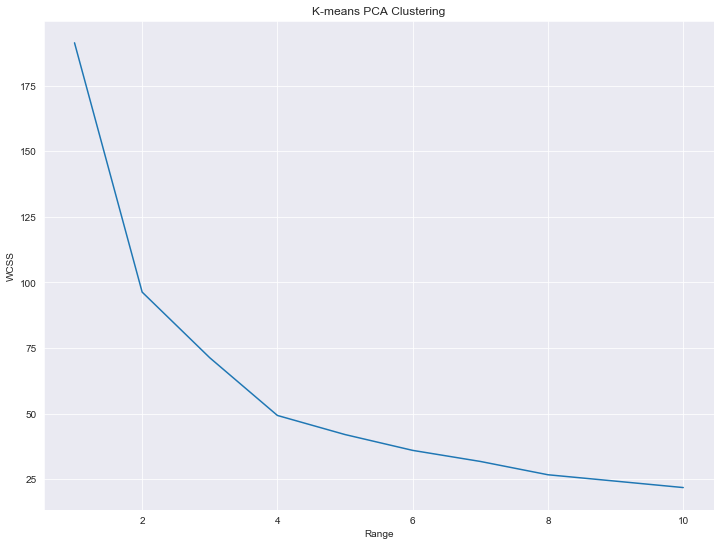

In [45]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss)
plt.title("K-means PCA Clustering")
plt.xlabel("Range")
plt.ylabel("WCSS")

### Note: Almost similar to KMeans result